In [8]:
##Imports
%matplotlib inline
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import json
## This is to get the connection to the nba endpoints correctly (hot fix to work until they push changes)
headers = {
    'Host': 'stats.nba.com',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:61.0) Gecko/20100101 Firefox/61.0',
    'Accept': 'application/json, text/plain, */*',
    'Accept-Language': 'en-US,en;q=0.5',
    'Referer': 'https://stats.nba.com/',
    'Accept-Encoding': 'gzip, deflate, br',
    'Connection': 'keep-alive',
}

In [17]:
from nba_api.stats.endpoints import playergamelog
## Lebron James
pgl = playergamelog.PlayerGameLog(player_id=2544, headers=headers)
gamelog = pgl.get_data_frames()[0]
gamelog.head()

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22019,2544,0021900374,"DEC 13, 2019",LAL @ MIA,W,37,11,22,0.500,...,7,9,12,1,0,8,2,28,9,1
1,22019,2544,0021900358,"DEC 11, 2019",LAL @ ORL,W,38,11,24,0.458,...,9,11,10,2,0,6,2,25,8,1
2,22019,2544,0021900342,"DEC 08, 2019",LAL vs. MIN,W,28,12,20,0.600,...,3,4,13,1,0,5,4,32,24,1
3,22019,2544,0021900329,"DEC 06, 2019",LAL @ POR,W,34,11,23,0.478,...,6,7,8,0,1,3,1,31,21,1
4,22019,2544,0021900314,"DEC 04, 2019",LAL @ UTA,W,29,9,21,0.429,...,4,4,12,1,0,1,3,20,14,1


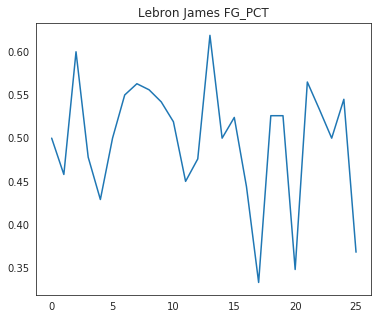

In [18]:
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(6,5))
plt.title('Lebron James FG_PCT')
plt.plot(range(gamelog.shape[0]), gamelog.FG_PCT)
plt.show()

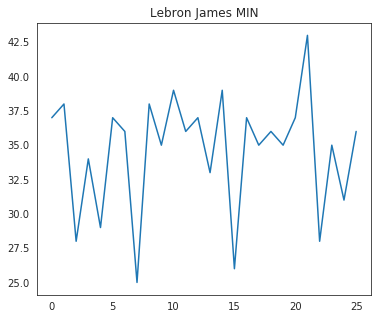

In [31]:
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(6,5))
plt.title('Lebron James MIN')
plt.plot(range(gamelog.shape[0]), gamelog.MIN)
plt.show()

In [19]:
### This is IDEA #2
### TODO: Experiment with different methods to get metrics 

def determine_stats_to_winning(player_game_data, player_name):  
    FG_PCT_THRESHOLD = 0.5
    
    stats_win_index = player_game_data.PTS + (2 * player_game_data.AST) 
    + (1.5 * player_game_data.REB) - 2 * (player_game_data.TOV + player_game_data.PF)
    + 2 * (player_game_data.STL + player_game_data.BLK)

    plt.scatter(stats_win_index, player_game_data.PLUS_MINUS, s=300, c=player_game_data.FG_PCT)
    plt.title(player_name)
    plt.show()

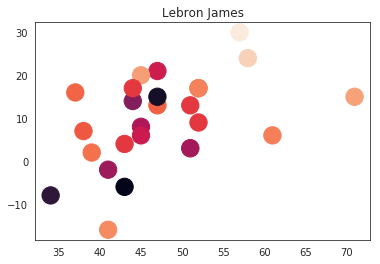

In [20]:
determine_stats_to_winning(gamelog, 'Lebron James')

In [16]:
## Build the team name to team_id map
from nba_api.stats.static import teams
nba_teams = teams.get_teams()
list_teams = ['ATL', 'BOS', 'CLE', 'NOP', 'CHI', 'DAL', 'DEN', 'GSW', 'HOU', 'LAC', 'LAL'
        , 'MIA', 'MIL', 'MIN', 'BKN', 'NYK', 'ORL', 'IND', 'PHI', 'PHX', 'POR', 'SAC'
        , 'SAS', 'OKC', 'TOR', 'UTA', 'MEM', 'WAS', 'DET', 'CHA']
i = 0
team_to_id = {}
for t in list_teams:
    team_to_id.update({t: nba_teams[i]['id']})
    i += 1
print(team_to_id)

{'ATL': 1610612737, 'BOS': 1610612738, 'CLE': 1610612739, 'NOP': 1610612740, 'CHI': 1610612741, 'DAL': 1610612742, 'DEN': 1610612743, 'GSW': 1610612744, 'HOU': 1610612745, 'LAC': 1610612746, 'LAL': 1610612747, 'MIA': 1610612748, 'MIL': 1610612749, 'MIN': 1610612750, 'BKN': 1610612751, 'NYK': 1610612752, 'ORL': 1610612753, 'IND': 1610612754, 'PHI': 1610612755, 'PHX': 1610612756, 'POR': 1610612757, 'SAC': 1610612758, 'SAS': 1610612759, 'OKC': 1610612760, 'TOR': 1610612761, 'UTA': 1610612762, 'MEM': 1610612763, 'WAS': 1610612764, 'DET': 1610612765, 'CHA': 1610612766}


In [38]:
# Make API Call for players across all seasons for a particular franchise
from nba_api.stats.endpoints import franchiseplayers

def get_winning_stats_per_team(team):
    fp = franchiseplayers.FranchisePlayers(team_id=team_to_id[team], headers=headers)
    players = fp.get_data_frames()[0]
    # Build the list of players in the 2019-2020 season
    active_players = players.loc[players['ACTIVE_WITH_TEAM'] == 1]
    ids_per_team = active_players['PERSON_ID'].values
    player_names = active_players['PLAYER'].values
    players_per_team = dict(zip(ids_per_team, player_names))
    ## Get the winning_stats_for a player
    for player in players_per_team:
        pgl = playergamelog.PlayerGameLog(player_id=player, headers=headers)
        player_game_data = pgl.get_data_frames()[0]
        determine_stats_to_winning(player_game_data, players_per_team[player])

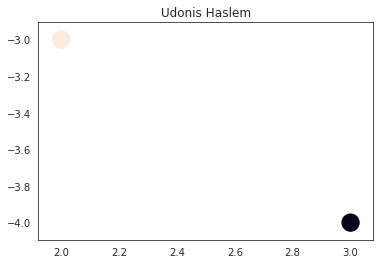

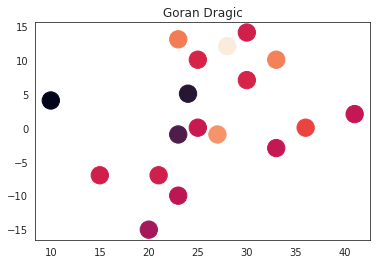

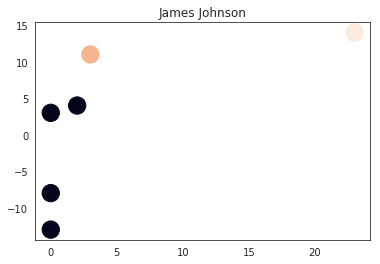

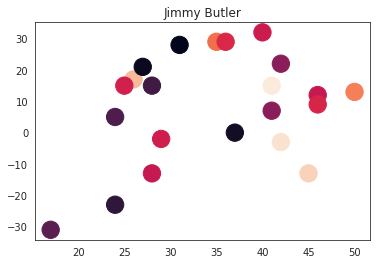

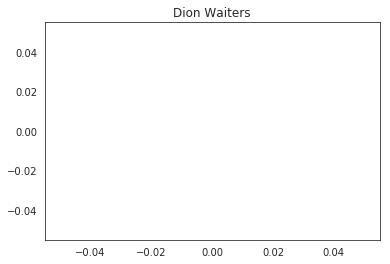

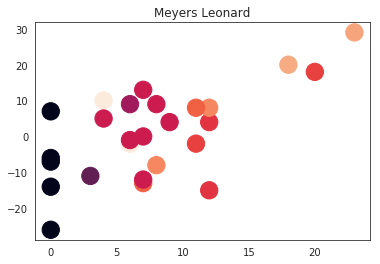

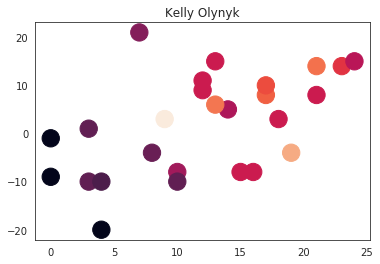

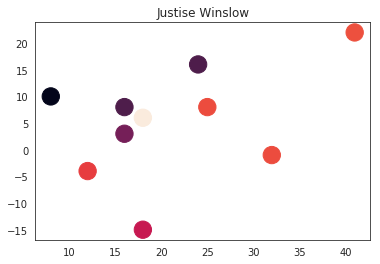

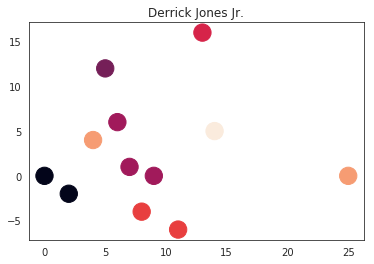

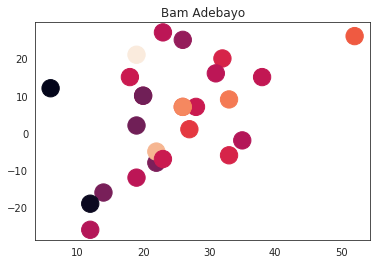

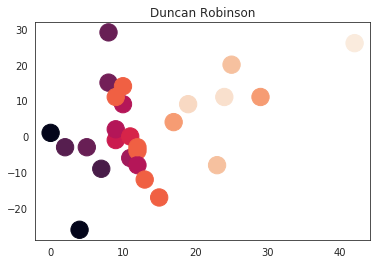

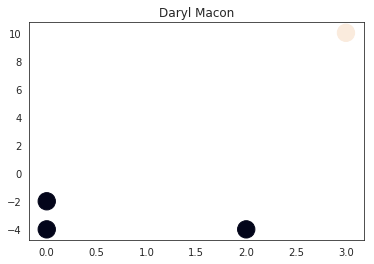

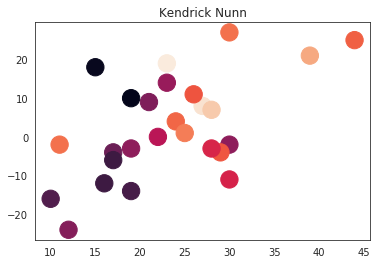

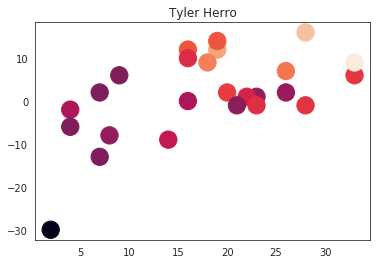

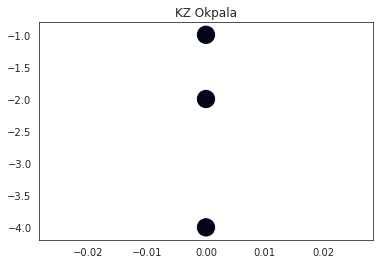

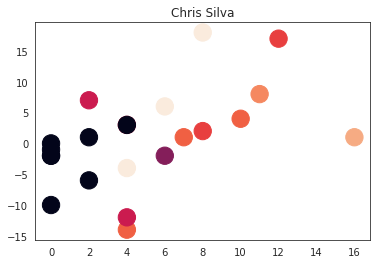

In [39]:
get_winning_stats_per_team("MIA")